In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_pipe
device = "cuda:5"
pipe = load_pipe(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [3]:
from utils import load_image_data, load_image, display_images
from methods.dds import image_optimization

In [4]:
image_data = load_image_data("images/data.json")
print(len(image_data))

5


a photo of a cat a photo of a tiger


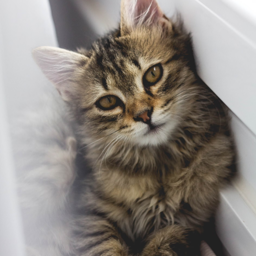

In [5]:
editing_data = image_data[3]
path, source_caption, target_caption = (
    editing_data["path"],
    editing_data["source_caption"],
    editing_data["target_caption"],
)
print(source_caption, target_caption)
image = load_image(path)
image.resize((256, 256))

/data1/junchao/miniconda3/envs/tian/lib/python3.11/site-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `prediction_type` directly via 'PNDMScheduler' object attribute is deprecated. Please access 'prediction_type' over 'PNDMScheduler's config object instead, e.g. 'scheduler.config.prediction_type'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
100%|██████████| 200/200 [00:08<00:00, 23.33it/s]


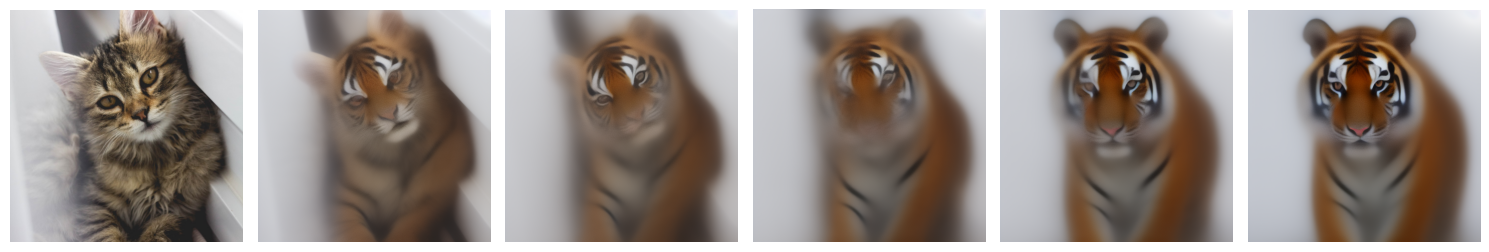

In [6]:
images = image_optimization(
    pipe, image, source_caption, target_caption, device=device, use_dds=False
)
display_images(images)

100%|██████████| 200/200 [00:11<00:00, 17.44it/s]


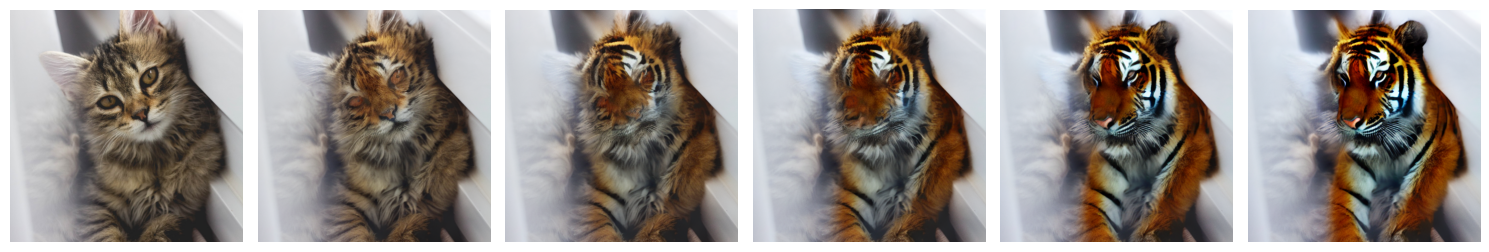

In [7]:



images = image_optimization(pipe, image, source_caption, target_caption,device=device, use_dds=True)
display_images(images)
